<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/Clustering/blob/main/Clustering_timeseries/Clustering_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)


We'll standardize the data since neural networks often benefit from scaling of the input features.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


We can use TensorFlow/Keras in Colab to load a pretrained model or train a simple one on the dataset:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple model - in a real scenario, you'd use a pretrained model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(scaled_df.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))  # This layer is our feature extractor

# Compile the model
model.compile(optimizer='adam', loss='mse')

# You can train this model on the dataset, or ideally load your pretrained model


After extracting features, use a clustering algorithm like K-Means:

In [ ]:
from sklearn.cluster import KMeans

# Dummy feature extraction step - replace this with actual model predictions
features = model.predict(scaled_df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(features)


645/645 [==============================] - 3s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualization
Visualizing  the clusters in the feature space:

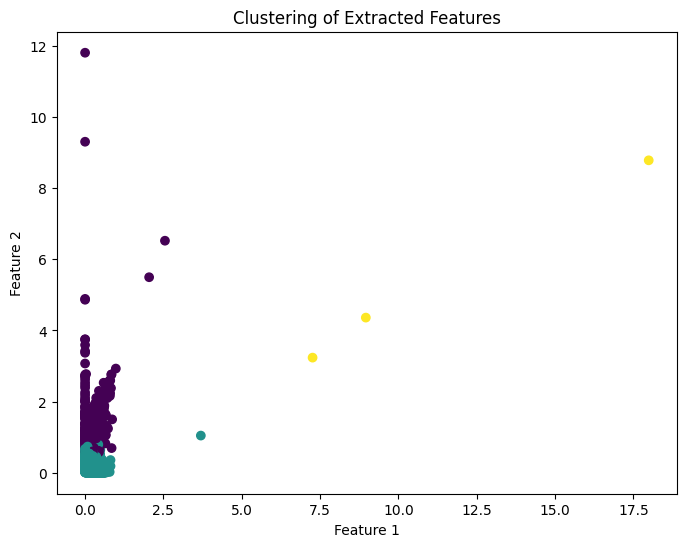

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clustering of Extracted Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
